In [2]:
"""TO DO: CREATE A FUNCTION WITH PARAMETERS player1 AND player2 TO MAKE A REPRODUCIBLE REPORT"""

#Importing the required packages.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import numpy as np
import warnings


warnings.filterwarnings('ignore')
sns.set()

## Run this cell first.

In [3]:
#Importing in the data and getting rid of the rank column.
#This is game by game data for the 2023-2024 full season.
data = pd.read_csv('https://github.com/noah-po/Personal-Stuff/raw/main/Sports%20Stuff.csv')
data = data.iloc[:,1:]

#For naming stuffs
player_data_2023 = data

In [4]:
def playerCorrelations():
    
    p1_addl = str(input("Input the first player ID: "))
    p2_addl = str(input("Input the second player ID: "))
    
    #Creating a subset where at least one of the players played.
    subset = player_data_2023[(player_data_2023['Player-additional'] == p1_addl) | (player_data_2023['Player-additional'] == p2_addl)]
    overlapped_dates = subset[subset.duplicated('Date', keep=False) == True].sort_values("Date").reset_index()
    
    #Getting basic data from the overlapped games. We add aditional columns below.
    overlapped_dates = overlapped_dates.loc[:,['Player','PTS','TRB','AST','3P','FGA','FG','3PA','3P', 'Player-additional']]
    
    #Creating the following columns: 
    #points + rebounds, points + assists, rebounds + assists, points + rebounds + assists

    overlapped_dates['PTS + RB'] = overlapped_dates["PTS"] + overlapped_dates['TRB']
    overlapped_dates['PTS + AST'] = overlapped_dates["PTS"] + overlapped_dates['AST']
    overlapped_dates['RB + AST'] = overlapped_dates["TRB"] + overlapped_dates['AST']
    overlapped_dates['PTS + RB + AST'] = overlapped_dates["PTS"] + overlapped_dates['TRB'] + overlapped_dates["AST"]
    
    
    #Subsetting to include games where both players played.
    player1_data = overlapped_dates[overlapped_dates['Player-additional'] == p1_addl].reset_index(drop = True).reset_index()
    player2_data = overlapped_dates[overlapped_dates['Player-additional'] == p2_addl].reset_index(drop = True).reset_index()
    
    #Creating our final dataset and properly naming it. 
    beef = pd.concat([player1_data,player2_data],axis = 1)
    names = [f"{player1_data.iloc[0,1]} " + i for i in beef.columns][0:14] + [f"{player2_data.iloc[0,1]} " + i for i in beef.columns][14:]
    final = beef.set_axis(names, axis=1)
    
    #The code below yields the final correlation visualization.
    corr_players = final.corr()
    corr_players.corr()
    
    plt.figure(figsize=(20, 15))
    sns.heatmap(corr_players,
                annot = True,
                fmt = '.2f',
                cmap='Blues')
    plt.title(f'Correlation between {player1_data.iloc[0,1]} and {player2_data.iloc[0,1]}')
    plt.show()
    

Input the first player ID: duranke01
Input the second player ID: bookede01


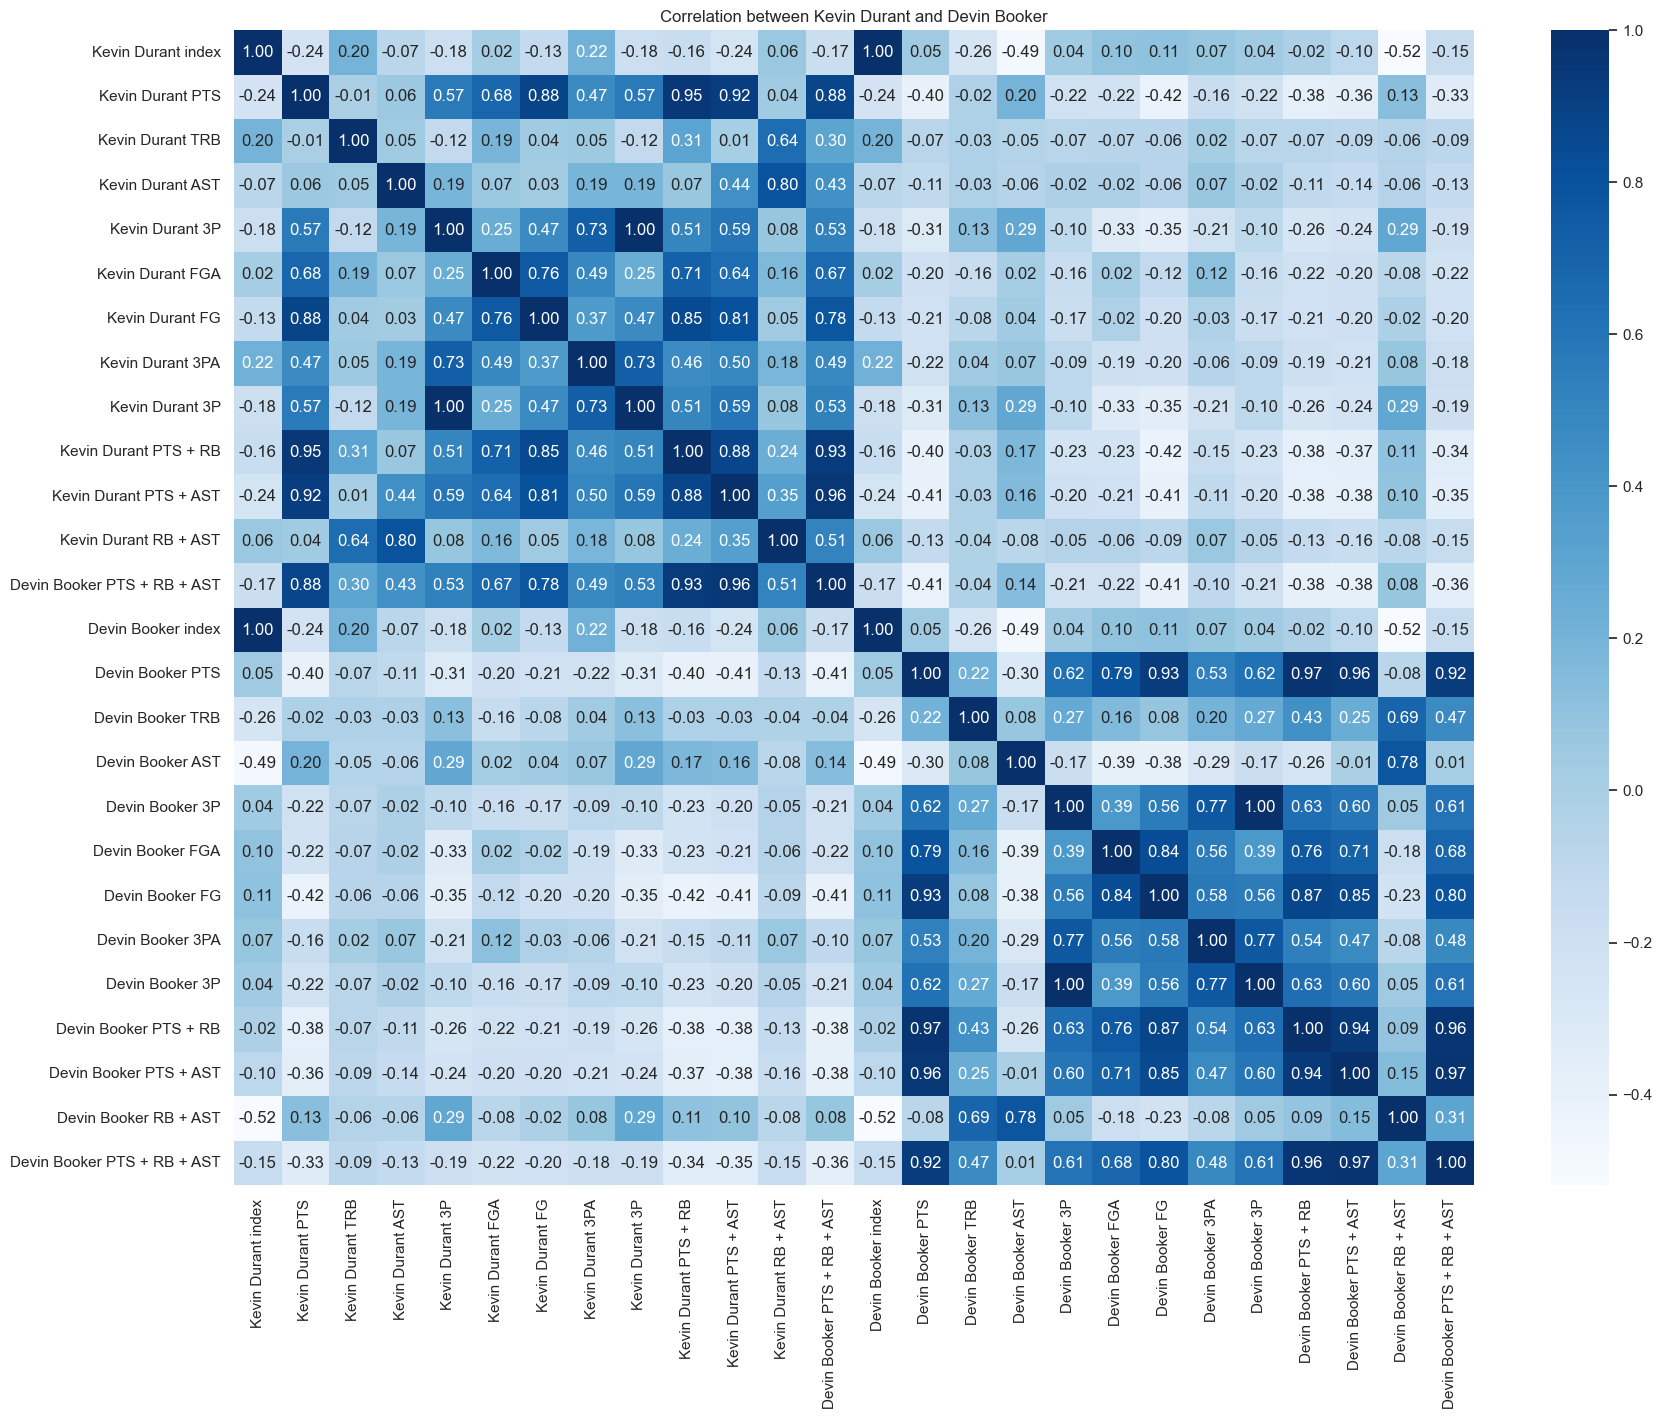

In [5]:
playerCorrelations()